<a href="https://colab.research.google.com/github/ghanbarifereshteh/singlecolorprj/blob/main/noisysinglecolor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from PIL import Image


In [ ]:
#generate original data
#generate 3 random number and then create a 180*180 image(with single color)
from PIL import Image
def createimage(numberOfimg,sizeOfImage):
  for i in range(numberOfimg):
    red = np.random.choice(range(256), size=1)
    green = np.random.choice(range(256), size=1)
    blue = np.random.choice(range(256), size=1)
    img = Image.new('RGB', (sizeOfImage, sizeOfImage), (red[0], green[0], blue[0]))
    img.save(str(i)+".jpg")

In [75]:
#create image whith percent% noise
def createNoisyImage(numberOfImages,sizeOfImage,percent):
  for i in range(0,numberOfImages):
    noiseColor=list(np.random.choice(range(256), size=3));
    name = str(i)+".jpg"
    img = Image.open(name)
    for j in range(0,sizeOfImage*percent) :
        x=np.random.choice(range(100))
        y=np.random.choice(range(100))
        img.putpixel((x,y), (noiseColor[0], noiseColor[1], noiseColor[2]))
        #plt.imshow(img)
    newName = "noise"+str(percent)+str(i)+".jpg"
    img.save(newName)


In [76]:
ls

noisy15black/  noisy15purple/  noisy15yellow/  noisygreen/   noisywhite/
noisy15blue/   noisy15red/     noisyblack/     noisypurple/  noisyyellow/
noisy15green/  noisy15white/   noisyblue/      noisyred/     sample_data/


In [61]:
#def createFolder(percent,color):
 # os.mkdir("/content/noisy"+str(percent)+str(color))

In [295]:
rm -rf noisy*

In [296]:
mkdir noisyblack15

In [297]:
mkdir noisyblue15

In [300]:
mkdir noisyred15

In [298]:
mkdir noisygreen15

In [299]:
mkdir noisywhite15


In [301]:
mkdir noisyyellow15

In [302]:
mkdir noisypurple15

In [303]:
ls

noisyblack15/  noisygreen15/   noisyred15/    noisyyellow15/
noisyblue15/   noisypurple15/  noisywhite15/


In [267]:
from numpy import asarray
import shutil
import os
#from numpy import asarray
# load the image and convert into
# numpy array
def imagesToFolder(data_Length,sizeOfImage,percent):
  folder = ""
  label = ""
  sum = 0
  numpydata_noisy = np.empty([data_Length, sizeOfImage, sizeOfImage, 3], dtype=np.int)
  labels_noisy = np.arange(0,data_Length)
  for i in range(data_Length):
    img = Image.open("noise"+str(percent)+str(i)+'.jpg')
    numpydata_noisy[i] = asarray(img)
    for ii in range(sizeOfImage):
      for jj in range(sizeOfImage):
        sum = sum + numpydata_noisy[i][ii][jj][0]
    red = sum / sizeOfImage * sizeOfImage
    sum = 0
    for ii in range(sizeOfImage):
      for jj in range(sizeOfImage):
        sum = sum + numpydata_noisy[i][ii][jj][1]
    green = sum / sizeOfImage * sizeOfImage
    sum = 0
    for ii in range(sizeOfImage):
      for jj in range(sizeOfImage):
        sum = sum + numpydata_noisy[i][ii][jj][2]
    blue = sum / sizeOfImage * sizeOfImage
    #red = numpydata_noisy[i][0][0][0]
    #green = numpydata_noisy[i][0][0][1]
    #blue = numpydata_noisy[i][0][0][2]
    if(red > green):
      if(red>blue):
        label = 0  #red
        folder = "noisyred"
      elif (red == blue) and (blue==green) and (red == 255):
        label = 1 #white
        folder = "noisywhite"
      elif(red == blue) and (blue==green) and (red != 255):
        label = 2  #black
        folder = "noisyblack"
      elif(red == blue):
        label = 3  #purple
        folder = "noisypurple"
    elif (red == green):
      label = 4 #yellow
      folder = "noisyyellow"
    elif(green>=blue):
      label = 5 #green
      folder = "noisygreen"
    else:
      label = 6 #blue
      folder = "noisyblue"
    shutil.move("noise"+str(percent)+str(i)+".jpg", str(folder)+str(percent)+"/"+"noise"+str(percent)+str(i)+".jpg")
    labels_noisy[i] = label
  return labels_noisy,numpydata_noisy

create 1000 images as a single color dataset

In [376]:
createimage(1000,100)

In [ ]:
ls

when you want to create iamges with 15% noises

In [306]:
createNoisyImage(1000,100,15)

In [307]:
(labels_test,numpydata_test) = imagesToFolder(1000,100,15)

<ipython-input-267-adea43b418ad>:11: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  numpydata_noisy = np.empty([data_Length, sizeOfImage, sizeOfImage, 3], dtype=np.int)


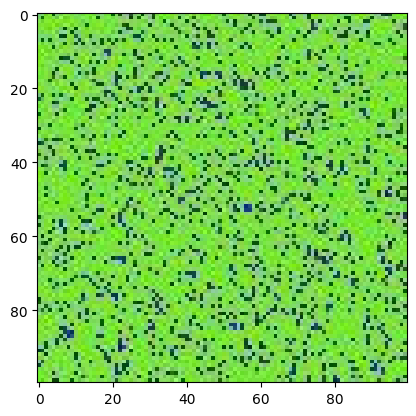

In [317]:
import matplotlib.pyplot as plt
plt.imshow(numpydata_test[357])


In [326]:
cd ..

/root


when you want to create iamges with 25% noises

In [327]:
createNoisyImage(1000,100,25)

In [331]:
rm -rf noisy*

In [332]:
mkdir noisyred25

In [333]:
mkdir noisygreen25

In [334]:
mkdir noisyblack25

In [336]:
mkdir noisyblue25

In [335]:
mkdir noisyyellow25

In [338]:
mkdir noisypurple25

In [337]:
mkdir noisywhite25

In [341]:
(labels_test,numpydata_test) = imagesToFolder(1000,100,25)

<ipython-input-267-adea43b418ad>:11: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  numpydata_noisy = np.empty([data_Length, sizeOfImage, sizeOfImage, 3], dtype=np.int)


In [353]:
cd noisyblue25

/root/noisyblue25


In [354]:
ls

noise25125.jpg  noise25424.jpg  noise2554.jpg   noise25703.jpg  noise258.jpg
noise25254.jpg  noise25436.jpg  noise25589.jpg  noise25757.jpg  noise25962.jpg
noise25311.jpg  noise25491.jpg  noise25653.jpg  noise25762.jpg
noise2539.jpg   noise254.jpg    noise25656.jpg  noise25855.jpg
noise25414.jpg  noise25507.jpg  noise25687.jpg  noise25857.jpg


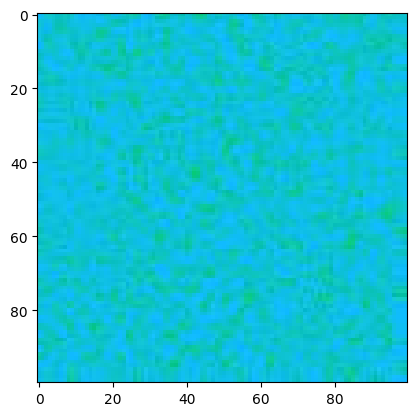

In [355]:
import matplotlib.pyplot as plt
plt.imshow(numpydata_test[762])

In [356]:
rm -rf noisy*

In [387]:
mkdir noisyblue45

In [388]:
mkdir noisyblack45

In [390]:
mkdir noisyred45

mkdir: cannot create directory ‘noisyred45’: File exists


In [389]:
mkdir noisygreen45

mkdir: cannot create directory ‘noisygreen45’: File exists


In [384]:
mkdir noisyyellow45

mkdir: cannot create directory ‘noisyyellow45’: File exists


In [385]:
mkdir noisywhite45

In [391]:
mkdir noisypurple45

mkdir: cannot create directory ‘noisypurple45’: File exists


In [377]:
ls

0.jpg    213.jpg  327.jpg  440.jpg  554.jpg  668.jpg  781.jpg  895.jpg
100.jpg  214.jpg  328.jpg  441.jpg  555.jpg  669.jpg  782.jpg  896.jpg
101.jpg  215.jpg  329.jpg  442.jpg  556.jpg  66.jpg   783.jpg  897.jpg
102.jpg  216.jpg  32.jpg   443.jpg  557.jpg  670.jpg  784.jpg  898.jpg
103.jpg  217.jpg  330.jpg  444.jpg  558.jpg  671.jpg  785.jpg  899.jpg
104.jpg  218.jpg  331.jpg  445.jpg  559.jpg  672.jpg  786.jpg  89.jpg
105.jpg  219.jpg  332.jpg  446.jpg  55.jpg   673.jpg  787.jpg  8.jpg
106.jpg  21.jpg   333.jpg  447.jpg  560.jpg  674.jpg  788.jpg  900.jpg
107.jpg  220.jpg  334.jpg  448.jpg  561.jpg  675.jpg  789.jpg  901.jpg
108.jpg  221.jpg  335.jpg  449.jpg  562.jpg  676.jpg  78.jpg   902.jpg
109.jpg  222.jpg  336.jpg  44.jpg   563.jpg  677.jpg  790.jpg  903.jpg
10.jpg   223.jpg  337.jpg  450.jpg  564.jpg  678.jpg  791.jpg  904.jpg
110.jpg  224.jpg  338.jpg  451.jpg  565.jpg  679.jpg  792.jpg  905.jpg
111.jpg  225.jpg  339.jpg  452.jpg  566.jpg  67.jpg   793.jpg  906.jpg
112.jpg  

In [379]:
createNoisyImage(1000,100,45)

In [392]:
(labels_test,numpydata_test) = imagesToFolder(1000,100,45)

<ipython-input-267-adea43b418ad>:11: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  numpydata_noisy = np.empty([data_Length, sizeOfImage, sizeOfImage, 3], dtype=np.int)


In [404]:
cd noisyred45

/root/noisyred45


In [405]:
ls

noise450.jpg    noise45275.jpg  noise45453.jpg  noise45643.jpg  noise45822.jpg
noise45100.jpg  noise45277.jpg  noise45454.jpg  noise45644.jpg  noise45823.jpg
noise45102.jpg  noise45278.jpg  noise45455.jpg  noise45645.jpg  noise45824.jpg
noise45103.jpg  noise45279.jpg  noise45456.jpg  noise45647.jpg  noise45825.jpg
noise45104.jpg  noise4527.jpg   noise45457.jpg  noise45648.jpg  noise45826.jpg
noise45105.jpg  noise45280.jpg  noise45458.jpg  noise45649.jpg  noise45827.jpg
noise45106.jpg  noise45281.jpg  noise45459.jpg  noise4564.jpg   noise4582.jpg
noise45108.jpg  noise45282.jpg  noise4545.jpg   noise45650.jpg  noise45830.jpg
noise45109.jpg  noise45283.jpg  noise45460.jpg  noise45651.jpg  noise45832.jpg
noise4510.jpg   noise45284.jpg  noise45461.jpg  noise45652.jpg  noise45833.jpg
noise45110.jpg  noise45285.jpg  noise45463.jpg  noise45653.jpg  noise45834.jpg
noise45111.jpg  noise45286.jpg  noise45464.jpg  noise45654.jpg  noise45836.jpg
noise45112.jpg  noise45287.jpg  noise45466.jpg  noise

when we make 45% noises on images, even the classification of images in the folder was not done well. for example, this image is green or blue. but it is in thr red folder


f

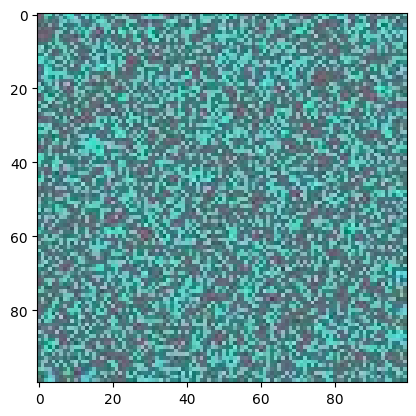

In [409]:
import matplotlib.pyplot as plt
plt.imshow(numpydata_test[9])

In [422]:
ls

noise450.jpg    noise45275.jpg  noise45453.jpg  noise45643.jpg  noise45822.jpg
noise45100.jpg  noise45277.jpg  noise45454.jpg  noise45644.jpg  noise45823.jpg
noise45102.jpg  noise45278.jpg  noise45455.jpg  noise45645.jpg  noise45824.jpg
noise45103.jpg  noise45279.jpg  noise45456.jpg  noise45647.jpg  noise45825.jpg
noise45104.jpg  noise4527.jpg   noise45457.jpg  noise45648.jpg  noise45826.jpg
noise45105.jpg  noise45280.jpg  noise45458.jpg  noise45649.jpg  noise45827.jpg
noise45106.jpg  noise45281.jpg  noise45459.jpg  noise4564.jpg   noise4582.jpg
noise45108.jpg  noise45282.jpg  noise4545.jpg   noise45650.jpg  noise45830.jpg
noise45109.jpg  noise45283.jpg  noise45460.jpg  noise45651.jpg  noise45832.jpg
noise4510.jpg   noise45284.jpg  noise45461.jpg  noise45652.jpg  noise45833.jpg
noise45110.jpg  noise45285.jpg  noise45463.jpg  noise45653.jpg  noise45834.jpg
noise45111.jpg  noise45286.jpg  noise45464.jpg  noise45654.jpg  noise45836.jpg
noise45112.jpg  noise45287.jpg  noise45466.jpg  noise

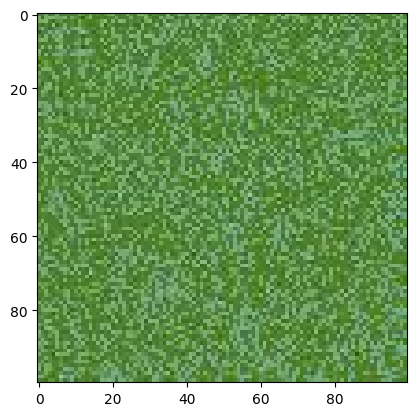

In [429]:
import matplotlib.pyplot as plt
plt.imshow(numpydata_test[437])
plt.imshow(numpydata_test[57])

In [420]:
ls

noise450.jpg    noise45275.jpg  noise45453.jpg  noise45643.jpg  noise45822.jpg
noise45100.jpg  noise45277.jpg  noise45454.jpg  noise45644.jpg  noise45823.jpg
noise45102.jpg  noise45278.jpg  noise45455.jpg  noise45645.jpg  noise45824.jpg
noise45103.jpg  noise45279.jpg  noise45456.jpg  noise45647.jpg  noise45825.jpg
noise45104.jpg  noise4527.jpg   noise45457.jpg  noise45648.jpg  noise45826.jpg
noise45105.jpg  noise45280.jpg  noise45458.jpg  noise45649.jpg  noise45827.jpg
noise45106.jpg  noise45281.jpg  noise45459.jpg  noise4564.jpg   noise4582.jpg
noise45108.jpg  noise45282.jpg  noise4545.jpg   noise45650.jpg  noise45830.jpg
noise45109.jpg  noise45283.jpg  noise45460.jpg  noise45651.jpg  noise45832.jpg
noise4510.jpg   noise45284.jpg  noise45461.jpg  noise45652.jpg  noise45833.jpg
noise45110.jpg  noise45285.jpg  noise45463.jpg  noise45653.jpg  noise45834.jpg
noise45111.jpg  noise45286.jpg  noise45464.jpg  noise45654.jpg  noise45836.jpg
noise45112.jpg  noise45287.jpg  noise45466.jpg  noise

In [411]:
cd noisygreen45/

/root/noisygreen45


In [412]:
ls

noise45101.jpg  noise45339.jpg  noise45541.jpg  noise45731.jpg  noise4584.jpg
noise45107.jpg  noise45346.jpg  noise45548.jpg  noise45743.jpg  noise45871.jpg
noise4511.jpg   noise45354.jpg  noise45557.jpg  noise45757.jpg  noise45872.jpg
noise45135.jpg  noise45385.jpg  noise45564.jpg  noise4575.jpg   noise45885.jpg
noise4515.jpg   noise45400.jpg  noise45565.jpg  noise45783.jpg  noise45901.jpg
noise4516.jpg   noise4543.jpg   noise45572.jpg  noise45784.jpg  noise45906.jpg
noise45180.jpg  noise45440.jpg  noise45577.jpg  noise45787.jpg  noise45913.jpg
noise45181.jpg  noise45445.jpg  noise45579.jpg  noise45793.jpg  noise45916.jpg
noise45182.jpg  noise45462.jpg  noise45589.jpg  noise45797.jpg  noise45918.jpg
noise45194.jpg  noise45465.jpg  noise45592.jpg  noise45798.jpg  noise45939.jpg
noise45251.jpg  noise45470.jpg  noise45593.jpg  noise45803.jpg  noise45940.jpg
noise45273.jpg  noise45475.jpg  noise45601.jpg  noise45810.jpg  noise45949.jpg
noise45276.jpg  noise45503.jpg  noise45604.jpg  noise

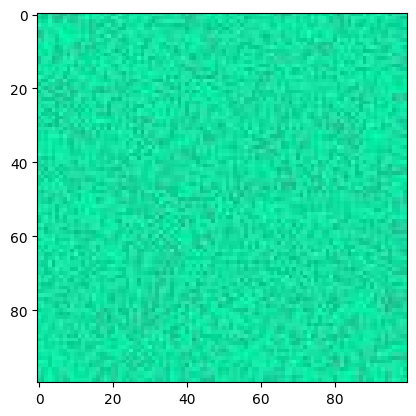

In [417]:
import matplotlib.pyplot as plt
plt.imshow(numpydata_test[918])

In [393]:
batch_size = 32
img_height = 100
img_width = 100
data_dir = "/root"

In [102]:
ls

In [394]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 1000 files belonging to 15 classes.
Using 200 files for validation.


In [395]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 1000 files belonging to 15 classes.
Using 800 files for training.


In [345]:
from tensorflow.keras import datasets, layers, models
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [346]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [347]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_21 (Conv2D)          (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 49, 49, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 47, 47, 64)        18496     
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 23, 23, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_23 (Conv2D)          (None, 21, 21, 64)        36928     
                                                                 
 flatten_7 (Flatten)         (None, 28224)            

In [240]:
numpydata_test.shape

(1000, 100, 100, 3)

In [348]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(numpydata_test, labels_test, epochs=10)

Epoch 1/10
32/32 [==============================] - 19s 576ms/step - loss: 7.2112 - accuracy: 0.8190
Epoch 2/10
32/32 [==============================] - 20s 623ms/step - loss: 1.0246 - accuracy: 0.8150
Epoch 3/10
32/32 [==============================] - 18s 577ms/step - loss: 0.6121 - accuracy: 0.8670
Epoch 4/10
32/32 [==============================] - 19s 599ms/step - loss: 0.4585 - accuracy: 0.8860
Epoch 5/10
32/32 [==============================] - 19s 583ms/step - loss: 0.6140 - accuracy: 0.8670
Epoch 6/10
32/32 [==============================] - 18s 577ms/step - loss: 0.6307 - accuracy: 0.8840
Epoch 7/10
32/32 [==============================] - 20s 610ms/step - loss: 0.5991 - accuracy: 0.8850
Epoch 8/10
32/32 [==============================] - 19s 602ms/step - loss: 0.6847 - accuracy: 0.8850
Epoch 9/10
32/32 [==============================] - 21s 662ms/step - loss: 0.5034 - accuracy: 0.8870
Epoch 10/10
32/32 [==============================] - 19s 582ms/step - loss: 0.5070 - accura

result of validation for images with 15% noises

Epoch 1/10
32/32 [==============================] - 20s 604ms/step - loss: 16.7374 - accuracy: 0.8110
Epoch 2/10
32/32 [==============================] - 19s 587ms/step - loss: 0.7698 - accuracy: 0.8630
Epoch 3/10
32/32 [==============================] - 18s 567ms/step - loss: 0.5254 - accuracy: 0.8640
Epoch 4/10
32/32 [==============================] - 20s 613ms/step - loss: 0.7041 - **accuracy**: 0.8550
Epoch 5/10
32/32 [==============================] - 18s 567ms/step - loss: 0.5719 - accuracy: 0.8620
Epoch 6/10
32/32 [==============================] - 20s 616ms/step - loss: 0.5066 - accuracy: 0.8660
Epoch 7/10
32/32 [==============================] - 18s 570ms/step - loss: 0.3969 - accuracy: 0.8680
Epoch 8/10
32/32 [==============================] - 19s 600ms/step - loss: 0.3888 - accuracy: 0.8670
Epoch 9/10
32/32 [==============================] - 19s 579ms/step - loss: 0.3306 - accuracy: 0.8690
Epoch 10/10
32/32 [==============================] - 18s 573ms/step - loss: 0.3187 - accuracy: 0.8670

result of validation for images with 25% noises

Epoch 1/10
32/32 [==============================] - 19s 576ms/step - loss: 7.2112 - accuracy: 0.8190
Epoch 2/10
32/32 [==============================] - 20s 623ms/step - loss: 1.0246 - accuracy: 0.8150
Epoch 3/10
32/32 [==============================] - 18s 577ms/step - loss: 0.6121 - accuracy: 0.8670
Epoch 4/10
32/32 [==============================] - 19s 599ms/step - loss: 0.4585 - accuracy: 0.8860
Epoch 5/10
32/32 [==============================] - 19s 583ms/step - loss: 0.6140 - accuracy: 0.8670
Epoch 6/10
32/32 [==============================] - 18s 577ms/step - loss: 0.6307 - accuracy: 0.8840
Epoch 7/10
32/32 [==============================] - 20s 610ms/step - loss: 0.5991 - accuracy: 0.8850
Epoch 8/10
32/32 [==============================] - 19s 602ms/step - loss: 0.6847 - accuracy: 0.8850
Epoch 9/10
32/32 [==============================] - 21s 662ms/step - loss: 0.5034 - accuracy: 0.8870
Epoch 10/10
32/32 [==============================] - 19s 582ms/step - loss: 0.5070 - accuracy: 0.8870

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(numpydata_test,  labels_test, verbose=2)